In [88]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor0.csv')

In [3]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

In [110]:
sensor[sensor.date=='2016-07-06']

,sensor,con,spl,date,time
90,sensor_0,2854.57250,70.423718,2016-07-06,00:00:00
91,sensor_0,2486.30875,74.827854,2016-07-06,04:00:00
92,sensor_0,2857.81375,81.513272,2016-07-06,08:00:00
93,sensor_0,2734.44000,79.744834,2016-07-06,12:00:00
94,sensor_0,2680.43250,70.745454,2016-07-06,16:00:00
95,sensor_0,2240.76000,66.041200,2016-07-06,20:00:00


In [89]:
len(sensor)

111

In [5]:
print min(sensor.date), max(sensor.date)

2016-06-21 2016-07-11


In [6]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [91]:
sensor_con_date

,level_0,index,date,con
0,0,0,2016-06-21,16303.471250
1,1,1,2016-06-22,15132.481250
2,2,2,2016-06-23,21800.132500
3,3,3,2016-06-24,19625.582500
4,4,4,2016-06-25,16553.111250
5,5,5,2016-06-26,15668.431250
6,6,6,2016-06-27,58672.197500
7,7,7,2016-06-28,25213.595000
8,8,8,2016-06-29,21834.385000
9,9,9,2016-06-30,15843.130000


In [58]:
weather = pd.read_csv('Historical Weather.csv')

In [59]:
weather.columns

Index([u'Date', u'Temp. high', u'Temp. avg', u'Temp. low',
       u'Humidity high (%)', u'Humidity avg (%)', u'Humidity low (%)',
       u'Events'],
      dtype='object')

In [60]:
sensor_con_date.reset_index(inplace= True)

In [61]:
weather

,Date,Temp. high,Temp. avg,Temp. low,Humidity high (%),Humidity avg (%),Humidity low (%),Events
0,21/06/2016,88,79,70,79,55,30,Rain
1,22/06/2017,92,80,67,57,38,18,NaN
2,23/06/2018,84,77,69,93,68,43,NaN
3,24/06/2019,85,77,68,84,58,31,NaN
4,25/06/2020,81,73,65,81,56,30,NaN
5,26/06/2021,80,73,66,79,62,45,NaN
6,27/06/2022,81,74,66,93,75,57,Rain
7,28/06/2023,76,73,70,93,86,78,Rain
8,29/06/2024,89,80,70,93,61,29,NaN
9,30/06/2025,85,78,70,87,62,36,NaN


In [62]:
weather['date']= sensor.date

In [66]:
sensor_weather = pd.merge(sensor_con_date, weather, on ='date')

In [72]:
sensor_weather.drop(['level_0','index', 'Date'], axis=1, inplace = True)

In [74]:
sensor_weather

,date,con,Temp. high,Temp. avg,Temp. low,Humidity high (%),Humidity avg (%),Humidity low (%),Events
0,2016-06-21,16303.47125,88,79,70,79,55,30,Rain
1,2016-06-21,16303.47125,92,80,67,57,38,18,NaN
2,2016-06-21,16303.47125,84,77,69,93,68,43,NaN
3,2016-06-21,16303.47125,85,77,68,84,58,31,NaN
4,2016-06-21,16303.47125,81,73,65,81,56,30,NaN
5,2016-06-21,16303.47125,80,73,66,79,62,45,NaN
6,2016-06-22,15132.48125,81,74,66,93,75,57,Rain
7,2016-06-22,15132.48125,76,73,70,93,86,78,Rain
8,2016-06-22,15132.48125,89,80,70,93,61,29,NaN
9,2016-06-22,15132.48125,85,78,70,87,62,36,NaN


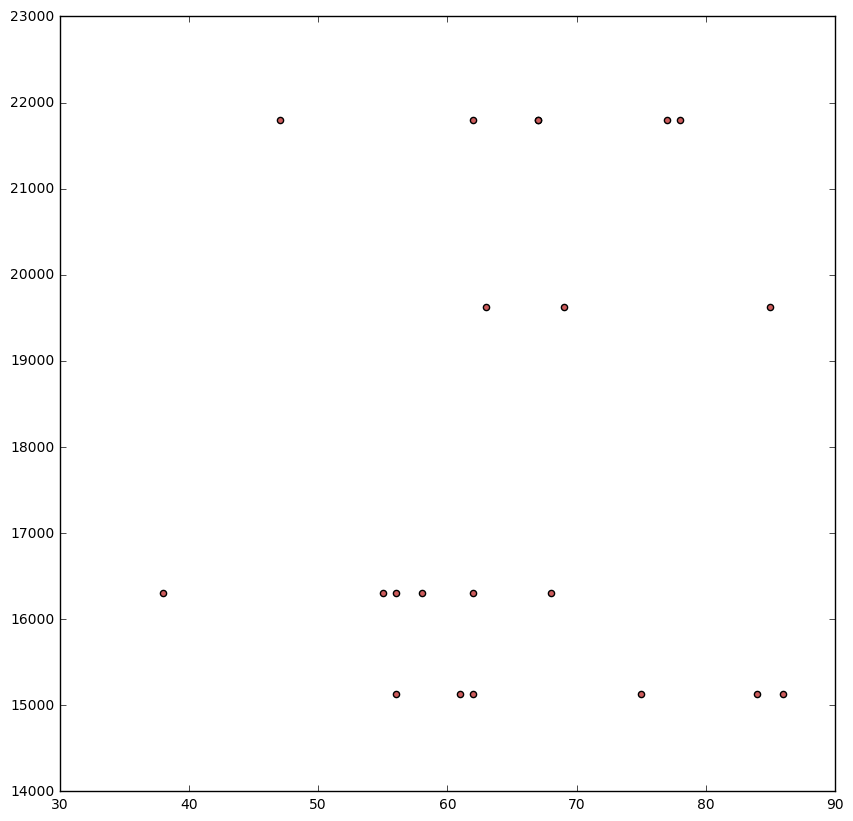

In [86]:
plt.figure(figsize= (10,10))
plt.scatter(sensor_weather['Humidity avg (%)'],sensor_weather.con,c = 'IndianRed')
plt.show()

In [87]:
lm = smf.ols(formula = 'con ~ Humidity avg (%)', data = data).fit()

NameError: name 'smf' is not defined

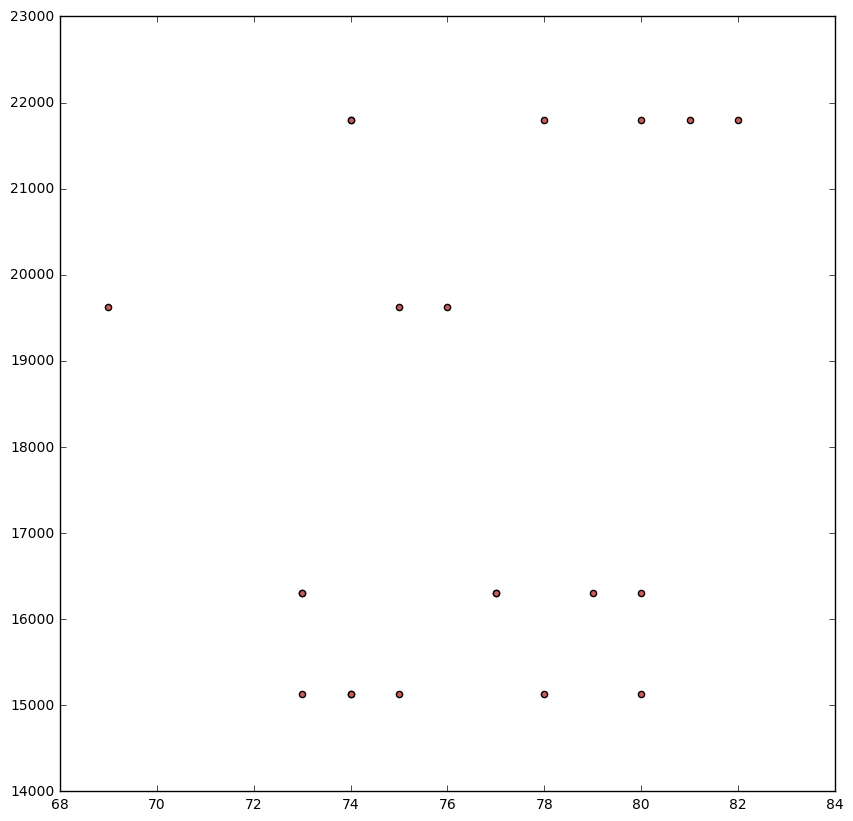

In [85]:
plt.figure(figsize= (10,10))
plt.scatter(sensor_weather['Temp. avg'],sensor_weather.con,c = 'IndianRed')
plt.show()